In [105]:
from random import sample

import pandas as pd
import polars as pl
import seaborn as sns

Sometimes this shit just doesn't make <strong> sense </strong>

In [3]:
df = pl.read_csv("./Dat/il_statewide_2020_04_01.csv", ignore_errors=True)
df

raw_row_number,date,time,location,beat,subject_age,subject_race,subject_sex,department_id,department_name,type,violation,citation_issued,warning_issued,outcome,contraband_found,contraband_drugs,contraband_weapons,search_conducted,search_person,search_vehicle,search_basis,reason_for_stop,vehicle_make,vehicle_year,raw_DriverRace,raw_ReasonForStop,raw_TypeOfMovingViolation,raw_ResultOfStop
i64,str,str,str,i64,str,str,str,i64,str,str,str,bool,bool,str,str,str,str,bool,bool,bool,str,str,str,i64,i64,i64,i64,i64
1,"""2012-09-15""","""10:20:00""","""60641""",1611,"""NA""","""hispanic""","""male""",13194,"""CHICAGO POLICE""","""vehicular""","""Moving Violation: Traffic Sign…",true,false,"""citation""","""NA""","""NA""","""NA""",false,false,false,"""NA""","""Moving Violation: Traffic Sign…","""CHRYSLER""",2004,4,1,4,1
2,"""2012-09-15""","""10:20:00""","""60189""",1912,"""NA""","""white""","""female""",13194,"""CHICAGO POLICE""","""vehicular""","""Moving Violation: Lane Violati…",true,false,"""citation""","""NA""","""NA""","""NA""",false,false,false,"""NA""","""Moving Violation: Lane Violati…","""LEXUS""",1999,1,1,2,1
3,"""2012-09-15""","""10:20:00""","""60638""",815,"""NA""","""hispanic""","""female""",13194,"""CHICAGO POLICE""","""vehicular""","""Moving Violation: Other""",true,false,"""citation""","""NA""","""NA""","""NA""",false,false,false,"""NA""","""Moving Violation: Other""","""WHITE GMC (BEGIN. MODEL YEAR 1…",2010,4,1,6,1
4,"""2012-09-15""","""10:20:00""","""60638""",925,"""NA""","""white""","""male""",13194,"""CHICAGO POLICE""","""vehicular""","""Moving Violation: Other""",true,false,"""citation""","""NA""","""NA""","""NA""",false,false,false,"""NA""","""Moving Violation: Other""","""CHEVROLET""",2008,1,1,6,1
5,"""2012-09-15""","""10:21:00""","""NA""",2032,"""NA""","""black""","""male""",13194,"""CHICAGO POLICE""","""vehicular""","""Moving Violation: Other""",true,false,"""citation""","""NA""","""NA""","""NA""",false,false,false,"""NA""","""Moving Violation: Other""","""DODGE""",2007,2,1,6,1
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
12748169,"""2017-11-29""","""15:44:00""","""60085""",null,"""NA""","""hispanic""","""male""",13501,"""ZION POLICE""","""vehicular""","""Moving Violation: Traffic Sign…",true,false,"""citation""","""FALSE""","""FALSE""","""FALSE""",true,true,true,"""NA""","""Moving Violation: Traffic Sign…","""MITS""",2005,4,1,4,1
12748170,"""2017-11-29""","""17:11:00""","""60099""",null,"""NA""","""hispanic""","""female""",13501,"""ZION POLICE""","""vehicular""","""License Plate/Registration""",true,false,"""citation""","""NA""","""NA""","""NA""",false,false,false,"""NA""","""License Plate/Registration""","""NISS""",2012,4,3,0,1
12748171,"""2017-11-30""","""17:40:00""","""60099""",null,"""NA""","""hispanic""","""female""",13501,"""ZION POLICE""","""vehicular""","""Moving Violation: Other""",true,false,"""citation""","""NA""","""NA""","""NA""",false,false,false,"""NA""","""Moving Violation: Other""","""DODG""",2008,4,1,6,1


<h2> Cleaning the Data </h2>

<p> We need to make sure the data is clean so that I don't have a aneurysm </p>

In [4]:
dfEah = df.select(
    (pl.col("location").str.contains("-").alias("locationHy")),
    (pl.col("location").str.contains(r"^\d{5}").alias("ValidZip"))
)

#reassign to df Expr or what ever polars uses
df = df.with_columns(dfEah)
#Then filter
dfFiltered = df.filter(
    (pl.col("locationHy") == False),
    (pl.col("ValidZip") == True)
)
dfFiltered

raw_row_number,date,time,location,beat,subject_age,subject_race,subject_sex,department_id,department_name,type,violation,citation_issued,warning_issued,outcome,contraband_found,contraband_drugs,contraband_weapons,search_conducted,search_person,search_vehicle,search_basis,reason_for_stop,vehicle_make,vehicle_year,raw_DriverRace,raw_ReasonForStop,raw_TypeOfMovingViolation,raw_ResultOfStop,locationHy,ValidZip
i64,str,str,str,i64,str,str,str,i64,str,str,str,bool,bool,str,str,str,str,bool,bool,bool,str,str,str,i64,i64,i64,i64,i64,bool,bool
1,"""2012-09-15""","""10:20:00""","""60641""",1611,"""NA""","""hispanic""","""male""",13194,"""CHICAGO POLICE""","""vehicular""","""Moving Violation: Traffic Sign…",true,false,"""citation""","""NA""","""NA""","""NA""",false,false,false,"""NA""","""Moving Violation: Traffic Sign…","""CHRYSLER""",2004,4,1,4,1,false,true
2,"""2012-09-15""","""10:20:00""","""60189""",1912,"""NA""","""white""","""female""",13194,"""CHICAGO POLICE""","""vehicular""","""Moving Violation: Lane Violati…",true,false,"""citation""","""NA""","""NA""","""NA""",false,false,false,"""NA""","""Moving Violation: Lane Violati…","""LEXUS""",1999,1,1,2,1,false,true
3,"""2012-09-15""","""10:20:00""","""60638""",815,"""NA""","""hispanic""","""female""",13194,"""CHICAGO POLICE""","""vehicular""","""Moving Violation: Other""",true,false,"""citation""","""NA""","""NA""","""NA""",false,false,false,"""NA""","""Moving Violation: Other""","""WHITE GMC (BEGIN. MODEL YEAR 1…",2010,4,1,6,1,false,true
4,"""2012-09-15""","""10:20:00""","""60638""",925,"""NA""","""white""","""male""",13194,"""CHICAGO POLICE""","""vehicular""","""Moving Violation: Other""",true,false,"""citation""","""NA""","""NA""","""NA""",false,false,false,"""NA""","""Moving Violation: Other""","""CHEVROLET""",2008,1,1,6,1,false,true
6,"""2012-09-15""","""10:30:00""","""60632""",815,"""NA""","""hispanic""","""male""",13194,"""CHICAGO POLICE""","""vehicular""","""Moving Violation: Other""",true,false,"""citation""","""NA""","""NA""","""NA""",false,false,false,"""NA""","""Moving Violation: Other""","""CHEVROLET""",2000,4,1,6,1,false,true
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
12748169,"""2017-11-29""","""15:44:00""","""60085""",null,"""NA""","""hispanic""","""male""",13501,"""ZION POLICE""","""vehicular""","""Moving Violation: Traffic Sign…",true,false,"""citation""","""FALSE""","""FALSE""","""FALSE""",true,true,true,"""NA""","""Moving Violation: Traffic Sign…","""MITS""",2005,4,1,4,1,false,true
12748170,"""2017-11-29""","""17:11:00""","""60099""",null,"""NA""","""hispanic""","""female""",13501,"""ZION POLICE""","""vehicular""","""License Plate/Registration""",true,false,"""citation""","""NA""","""NA""","""NA""",false,false,false,"""NA""","""License Plate/Registration""","""NISS""",2012,4,3,0,1,false,true
12748171,"""2017-11-30""","""17:40:00""","""60099""",null,"""NA""","""hispanic""","""female""",13501,"""ZION POLICE""","""vehicular""","""Moving Violation: Other""",true,false,"""citation""","""NA""","""NA""","""NA""",false,false,false,"""NA""","""Moving Violation: Other""","""DODG""",2008,4,1,6,1,false,true


In [5]:
dfFiltered.select(
    (pl.col("locationHy").value_counts()),
    (pl.col("ValidZip").value_counts())
)

locationHy,ValidZip
struct[2],struct[2]
"{false,12583563}","{true,12583563}"


In [6]:
dfFiltered = dfFiltered.with_columns(
    (pl.col("location").str.to_integer(strict=False)),
    (pl.col("date").str.to_datetime(format="%Y-%d-%m", strict = False)),
    (pl.col("time").str.to_time(format="%H:%M:%S", strict = False))
)

<h2> Some Findings? </h2>

<h4> Contraband Findings </h4>
<p> This is where I sperate out the contraband stuff
out from the rest of the dataset to make it easier to work with </p>

In [28]:
#Just some boilerplate code
def proportion(value, total):
    return value / total

In [7]:
Selected = dfFiltered.select(
    (pl.col("contraband_found").value_counts()),
    (pl.col("contraband_drugs").value_counts()),
    (pl.col("contraband_weapons").value_counts())
)
Selected

contraband_found,contraband_drugs,contraband_weapons
struct[2],struct[2],struct[2]
"{""NA"",12013611}","{""TRUE"",114310}","{""NA"",12013620}"
"{""FALSE"",452349}","{""NA"",12013650}","{""FALSE"",563553}"
"{""TRUE"",117603}","{""FALSE"",455603}","{""TRUE"",6390}"


In [8]:
AnyContraband = dfFiltered.filter(
    (pl.col("contraband_found") == "TRUE") |
    (pl.col("contraband_drugs") == "TRUE") |
    (pl.col("contraband_weapons") == "TRUE") |
    (pl.col("contraband_found") == "FALSE") |
    (pl.col("contraband_drugs") == "FALSE") |
    (pl.col("contraband_weapons") == "FALSE")
)

AnyContraband.with_columns(
    pl.col("contraband_found").replace_strict({"FALSE":False, "TRUE":True}, default=None).cast(pl.Boolean),
    pl.col("contraband_drugs").replace_strict({"FALSE":False, "TRUE":True}, default=None).cast(pl.Boolean),
    pl.col("contraband_weapons").replace_strict({"FALSE":False, "TRUE":True}, default=None).cast(pl.Boolean),
)

raw_row_number,date,time,location,beat,subject_age,subject_race,subject_sex,department_id,department_name,type,violation,citation_issued,warning_issued,outcome,contraband_found,contraband_drugs,contraband_weapons,search_conducted,search_person,search_vehicle,search_basis,reason_for_stop,vehicle_make,vehicle_year,raw_DriverRace,raw_ReasonForStop,raw_TypeOfMovingViolation,raw_ResultOfStop,locationHy,ValidZip
i64,datetime[μs],time,i64,i64,str,str,str,i64,str,str,str,bool,bool,str,bool,bool,bool,bool,bool,bool,str,str,str,i64,i64,i64,i64,i64,bool,bool
36,2012-01-01 00:00:00,01:13:00,60653,724,"""NA""","""black""","""male""",13194,"""CHICAGO POLICE""","""vehicular""","""License Plate/Registration""",false,true,"""warning""",false,false,false,true,true,true,"""consent""","""License Plate/Registration""","""BUICK""",2004,2,3,0,3,false,true
37,2012-01-01 00:00:00,01:14:00,60707,2531,"""NA""","""black""","""male""",13194,"""CHICAGO POLICE""","""vehicular""","""License Plate/Registration""",true,false,"""citation""",true,false,true,true,true,true,"""NA""","""License Plate/Registration""","""CADILLAC""",2000,2,3,0,1,false,true
80,2012-01-01 00:00:00,07:33:00,60608,924,"""NA""","""hispanic""","""male""",13194,"""CHICAGO POLICE""","""vehicular""","""Moving Violation: Traffic Sign…",true,false,"""citation""",false,false,false,true,true,true,"""NA""","""Moving Violation: Traffic Sign…","""CHEVROLET""",1997,4,1,4,1,false,true
89,2012-01-01 00:00:00,09:05:00,60609,914,"""NA""","""hispanic""","""male""",13194,"""CHICAGO POLICE""","""vehicular""","""Moving Violation: Traffic Sign…",true,false,"""citation""",false,false,false,true,true,true,"""consent""","""Moving Violation: Traffic Sign…","""CHEVROLET""",1984,4,1,4,1,false,true
100,2012-01-01 00:00:00,10:30:00,60612,1532,"""NA""","""black""","""male""",13194,"""CHICAGO POLICE""","""vehicular""","""Moving Violation: Other""",true,false,"""citation""",false,false,false,true,true,true,"""consent""","""Moving Violation: Other""","""CHEVROLET""",2011,2,1,6,1,false,true
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
12748088,2017-06-11 00:00:00,11:44:00,60099,null,"""NA""","""black""","""female""",13501,"""ZION POLICE""","""vehicular""","""Moving Violation: Speed""",true,false,"""citation""",true,true,false,true,false,true,"""NA""","""Moving Violation: Speed""","""CHEV""",2013,2,1,1,1,false,true
12748117,2017-11-11 00:00:00,23:06:00,60099,null,"""NA""","""black""","""male""",13501,"""ZION POLICE""","""vehicular""","""Equipment""",false,true,"""warning""",false,false,false,true,true,true,"""NA""","""Equipment""","""JEEP""",2002,2,2,0,3,false,true
12748138,null,11:33:00,60087,null,"""NA""","""black""","""male""",13501,"""ZION POLICE""","""vehicular""","""License Plate/Registration""",true,false,"""citation""",false,false,false,true,true,false,"""NA""","""License Plate/Registration""","""CADI""",2003,2,3,0,1,false,true


In [ ]:
AnyContraband.write_csv()

<h3> Hit Rates </h3>

In [36]:
counted = dfFiltered.select(
    pl.col("subject_race").value_counts(),
)

counts_df = counted.unnest("subject_race")

In [37]:
#have to filter out by stuff this is going to suck
AfricanAmerican = dfFiltered.filter(
    pl.col("subject_race") == "black"
)

LatinoAmerican = dfFiltered.filter(
    pl.col("subject_race") == "hispanic"
)

NativeAmerican = dfFiltered.filter(
    pl.col("subject_race") == "other"
)

asainPaific = dfFiltered.filter(
    pl.col("subject_race") == "asian/pacific islander"
)

WhiteAmerican = dfFiltered.filter(
    pl.col("subject_race") == "white"
)


In [38]:
count = 0
for i in counts_df["count"]:
    count += i
count = count - 692 # to acount for the stuff i'm not counting
count

12582871

In [39]:
AfricanCount = AfricanAmerican.select(
    pl.col("subject_race").count(),
)

LatinoCount = LatinoAmerican.select(
    pl.col("subject_race").count(),
)

NativeCount = NativeAmerican.select(
    pl.col("subject_race").count(),
)

asainPaific = asainPaific.select(
    pl.col("subject_race").count(),
)

whiteCount = WhiteAmerican.select(
    pl.col("subject_race").count()
)
whiteCount, NativeCount

(shape: (1, 1)
 ┌──────────────┐
 │ subject_race │
 │ ---          │
 │ u32          │
 ╞══════════════╡
 │ 7966948      │
 └──────────────┘,
 shape: (1, 1)
 ┌──────────────┐
 │ subject_race │
 │ ---          │
 │ u32          │
 ╞══════════════╡
 │ 34845        │
 └──────────────┘)

In [40]:
hitrates = {
    "white" : proportion(whiteCount["subject_race"], count),
    "african_american" : proportion(AfricanCount["subject_race"], count),
    "latin_american" : proportion(LatinoCount["subject_race"], count),
    "native_count": proportion(NativeCount["subject_race"], count),
    "asain_paific" : proportion(asainPaific["subject_race"], count),
}
hitrates

{'white': shape: (1,)
 Series: 'subject_race' [f64]
 [
 	0.633158
 ],
 'african_american': shape: (1,)
 Series: 'subject_race' [f64]
 [
 	0.199279
 ],
 'latin_american': shape: (1,)
 Series: 'subject_race' [f64]
 [
 	0.132312
 ],
 'native_count': shape: (1,)
 Series: 'subject_race' [f64]
 [
 	0.002769
 ],
 'asain_paific': shape: (1,)
 Series: 'subject_race' [f64]
 [
 	0.032482
 ]}

<h3> Hit by Department </h3>

In [44]:
allDepats = dfFiltered.select(
    pl.col("department_id").value_counts(),
)

In [46]:
sampleDeparts = allDepats.sample(10)
samples = sampleDeparts.unnest("department_id")

In [53]:
deparmentsDataframe = {}

for i in samples["department_id"]:
    deparmentsDataframe[i] = dfFiltered.filter(pl.col("department_id").is_in(i))

deparmentsDataframe

{13777: shape: (2_480, 31)
 ┌────────────┬────────────┬──────────┬──────────┬───┬───────────┬───────────┬───────────┬──────────┐
 │ raw_row_nu ┆ date       ┆ time     ┆ location ┆ … ┆ raw_TypeO ┆ raw_Resul ┆ locationH ┆ ValidZip │
 │ mber       ┆ ---        ┆ ---      ┆ ---      ┆   ┆ fMovingVi ┆ tOfStop   ┆ y         ┆ ---      │
 │ ---        ┆ datetime[μ ┆ time     ┆ i64      ┆   ┆ olation   ┆ ---       ┆ ---       ┆ bool     │
 │ i64        ┆ s]         ┆          ┆          ┆   ┆ ---       ┆ i64       ┆ bool      ┆          │
 │            ┆            ┆          ┆          ┆   ┆ i64       ┆           ┆           ┆          │
 ╞════════════╪════════════╪══════════╪══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
 │ 121944     ┆ 2012-08-01 ┆ 20:33:00 ┆ 62286    ┆ … ┆ 1         ┆ 1         ┆ false     ┆ true     │
 │            ┆ 00:00:00   ┆          ┆          ┆   ┆           ┆           ┆           ┆          │
 │ 121946     ┆ 2012-07-01 ┆ 19:22:00 ┆ 62040    ┆ … ┆ 

In [101]:
depermentHitRates = {}

for id, df in deparmentsDataframe.items():
    counts = df.select(
        pl.col("subject_race").value_counts().alias("counts")
    )
    
    valuescount = counts.unnest("counts")
    
    total = valuescount["count"].sum()
    
    dictHits = {}
    
    for x in valuescount.iter_rows():
        tempval = x[0]
        count = x[1]
        
        dictHits[tempval] = round(proportion(count, total), 5)
    
    depermentHitRates[id] = dictHits
# Print the final hit rates
print(depermentHitRates)

{13777: {'other': 0.0004, 'hispanic': 0.01452, 'asian/pacific islander': 0.00927, 'black': 0.07944, 'white': 0.89637}, 13440: {'asian/pacific islander': 0.00655, 'other': 0.00131, 'hispanic': 0.11497, 'white': 0.45266, 'black': 0.42452}, 13223: {'black': 0.1057, 'other': 0.00106, 'hispanic': 0.0983, 'asian/pacific islander': 0.0188, 'white': 0.77614}, 13655: {'white': 0.83333, 'black': 0.16667}, 13620: {'asian/pacific islander': 0.00574, 'black': 0.1989, 'white': 0.75583, 'other': 0.00093, 'hispanic': 0.0386}, 13503: {'white': 0.80784, 'asian/pacific islander': 0.00257, 'hispanic': 0.08504, 'other': 0.00222, 'black': 0.10233}, 13404: {'white': 0.90702, 'black': 0.0392, 'other': 0.00061, 'hispanic': 0.04224, 'asian/pacific islander': 0.01094}, 12998: {'hispanic': 0.01674, 'asian/pacific islander': 0.00179, 'black': 0.9491, 'white': 0.03215, 'other': 0.00022}, 13551: {'black': 0.0149, 'other': 0.00052, 'asian/pacific islander': 0.01646, 'hispanic': 0.07018, 'white': 0.89794}, 14150: {'wh

In [102]:
for key, value in depermentHitRates.items():
    print(f"{key}: {value}")

13777: {'other': 0.0004, 'hispanic': 0.01452, 'asian/pacific islander': 0.00927, 'black': 0.07944, 'white': 0.89637}
13440: {'asian/pacific islander': 0.00655, 'other': 0.00131, 'hispanic': 0.11497, 'white': 0.45266, 'black': 0.42452}
13223: {'black': 0.1057, 'other': 0.00106, 'hispanic': 0.0983, 'asian/pacific islander': 0.0188, 'white': 0.77614}
13655: {'white': 0.83333, 'black': 0.16667}
13620: {'asian/pacific islander': 0.00574, 'black': 0.1989, 'white': 0.75583, 'other': 0.00093, 'hispanic': 0.0386}
13503: {'white': 0.80784, 'asian/pacific islander': 0.00257, 'hispanic': 0.08504, 'other': 0.00222, 'black': 0.10233}
13404: {'white': 0.90702, 'black': 0.0392, 'other': 0.00061, 'hispanic': 0.04224, 'asian/pacific islander': 0.01094}
12998: {'hispanic': 0.01674, 'asian/pacific islander': 0.00179, 'black': 0.9491, 'white': 0.03215, 'other': 0.00022}
13551: {'black': 0.0149, 'other': 0.00052, 'asian/pacific islander': 0.01646, 'hispanic': 0.07018, 'white': 0.89794}
14150: {'white': 0.98

<h2> PLOTTING HAHAHAH </h2>

<Axes: ylabel='count'>

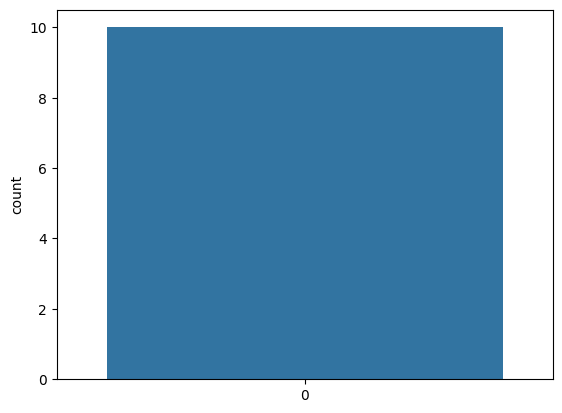

In [107]:
sns.countplot(depermentHitRates.keys())

In [111]:
flat_data = []

for dept_id, races in depermentHitRates.items():
    for race, proportion in races.items():
        flat_data.append({"department_id": dept_id, "subject_race": race, "proportion": proportion})

NewDF = pl.to_pan(flat_data)

sns.countplot(NewDF, x=pl.col("proportion"), y=pl.col("subject_race"))

TypeError: Cannot pass values for both `x` and `y`.